In [1]:
import numpy as np
import pandas as pd
import scipy.io
import os
import ieeg_funcs as ief
import dgFuncs as dg
from sklearn import preprocessing
import sys
from scipy import stats
import scipy.io as sio
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

In [136]:
# Reimport functions
import imp
imp.reload(ief)

<module 'ieeg_funcs' from '/Users/davidgroppe/PycharmProjects/DG_LIBRARY/ieeg_funcs.py'>

In [3]:
# LOAD RAW EEG
in_fname='/Users/davidgroppe/ONGOING/TWH_EEG_ORIG/NA/NA_d1_sz2.mat'
mat_dat=sio.loadmat(in_fname)
Sf=mat_dat['Sf']
vltg_dat=signal.detrend(mat_dat['matrix_bi'],0)
print(mat_dat.keys())

dict_keys(['Sf', 'group_end_index', 'matrix_bi', 'date_time', 'matrix_mo', '__header__', '__version__', '__globals__'])


In [22]:
data=mat_dat['matrix_bi'][:,12]
Sf=mat_dat['Sf']
wind_len=Sf
wind_step=int(np.round(Sf/10))
n_tpt=len(data)
tpts_sec=np.arange(0,n_tpt)/Sf
print(n_tpt)
print(tpts_sec.shape)
print(tpts_sec[0,:5])

93500
(1, 93500)
[ 0.     0.002  0.004  0.006  0.008]


In [5]:
# LOAD TAUFIK FEATURES
in_fname='/Users/davidgroppe/Desktop/NA_d1_sz2_F.mat'
proc_dat=sio.loadmat(in_fname)
print(proc_dat.keys())
F=proc_dat['F']
F.shape

dict_keys(['Sf', 'F', 'cfg', 'matrix_bi', 'group_end_index', 'matrix_mo', '__header__', '__version__', '__globals__'])


(6, 93500, 31)

In [140]:
temp_dat=mat_dat['matrix_bi'][:,[12, 1]].T

# Compute Hilbert
hilb = signal.hilbert(temp_dat)
hilb.shape

# Compute angle of phase diff
hilb_df=hilb[0,:]-hilb[1,:]
hilb_ang=np.angle(hilb_df) # This ranges from -pi to pi

# Unwrap that Angle
# print(np.max(hilb_ang))
# print(np.min(hilb_ang))
hilb_ang=np.unwrap(hilb_ang)
# hilb_ang_un=np.unwrap(hilb_ang)
# print(np.max(hilb_ang_un))
# print(np.min(hilb_ang_un))

# Take temporal derivative of that angle
hilb_ang_dif=np.zeros(hilb_ang.shape)
hilb_ang_dif[1:]=np.abs(np.diff(hilb_ang))

print(2*np.pi)
print(np.max(hilb_ang_dif))
print(np.min(hilb_ang_dif))


6.283185307179586
2.95734242052
0.0


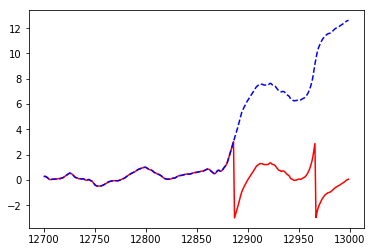

In [111]:
plt.figure(2)
plt.clf()
start_tpt=12700
stop_tpt=13000
plt.plot(np.arange(start_tpt,stop_tpt),hilb_ang[start_tpt:stop_tpt],'r-')
plt.plot(np.arange(start_tpt,stop_tpt),hilb_ang_un[start_tpt:stop_tpt],'b--');

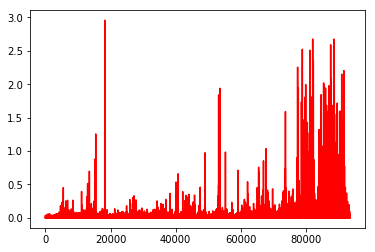

In [141]:
plt.figure(3)
plt.clf()
start_tpt=0
stop_tpt=len(hilb_ang_dif)
plt.plot(np.arange(start_tpt,stop_tpt),hilb_ang_dif[start_tpt:stop_tpt],'r-')

In [149]:
data=mat_dat['matrix_bi'][:,[12, 1]].T
Sf=mat_dat['Sf']
wind_len=Sf
wind_step=int(np.round(Sf/10))
n_tpt=data.shape[1]
tpts_sec=np.arange(0,n_tpt)/Sf
hilb_ang_dif, hilb_sec=ief.bp_hilb_phz_dif_delta(data, Sf, wind_len, wind_step, tpts_sec[0,:], bands)

(6, 1860)


/Users/davidgroppe/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


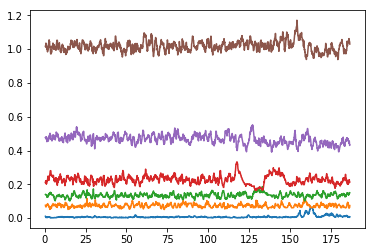

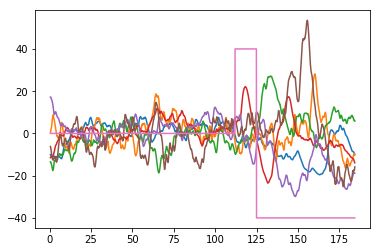

In [161]:
print(hilb_ang_dif.shape)
hilb_sec.shape

plt.figure(3)
plt.clf()
plt.plot(hilb_sec,hilb_ang_dif.T);

plt.figure(4)
plt.clf()
plt.plot(temp_dict['time_wind_sec'],temp_dict['ftrs'].T);
plt.plot(temp_dict['time_wind_sec'],temp_dict['peri_ictal']*40);

In [159]:
in_fname='/Users/davidgroppe/PycharmProjects/SZR_ANT/FTRS/ADELT_LAG6/NA/NA_d1_sz2_adelt_lag6.npz'
temp_dict=np.load(in_fname)
temp_dict.keys()

['ftr_list', 'peri_ictal', 'time_wind_sec', 'ftrs']

In [23]:
# Define frequency bands
bands=[(0, 4), (4, 8), (8, 13), (13,30), (30,50), (70, 100)]
band_labels=['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma', 'High Gamma']
n_band=len(bands)
print('# of freq bands %d' % n_band)

# Taufik uses the following bands: 4-8, 8-12, 15-20, 20-30, 30-60, 60-100

# of freq bands 6


In [46]:
# Bandpass data and apply Hilbert
# Taufik uses a 1000 order FIR, and chebwin to diminish side lobe attenuation:
# He does this in F_chan_list_1.m->filterBank.m

#hilb_phz_dif, hilb_sec=bp_hilb_phz_dif(data, Sf, wind_len, wind_step, tpts_sec, bands, filt_order=4):
data=mat_dat['matrix_bi'][:,[12, 1]].T
Sf=mat_dat['Sf']
wind_len=Sf
wind_step=int(np.round(Sf/10))
n_tpt=len(data)
tpts_sec=np.arange(0,n_tpt)/Sf

hilb_phz_dif, hilb_sec=ief.bp_hilb_phz_dif(data, Sf, wind_len, wind_step, tpts_sec, bands)

/Users/davidgroppe/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/davidgroppe/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [53]:
#bro=np.squeeze(hilb_phz_dif[:,:,0])
print(hilb_phz_dif.shape)
print(hilb_sec.shape)
print(data.shape)
print(hilb_phz_dif[3,:5])
print(np.abs(hilb_phz_dif[3,:5]))

(6, 1860)
(1860,)
(2, 93500)
[ 0.04447298-0.01187609j  0.02699218+0.00517039j  0.01366368-0.01568774j
  0.01918967-0.03568393j  0.02694220-0.03129569j]
[ 0.04603137  0.02748291  0.02080388  0.0405165   0.04129531]


In [51]:
np.real(hilb_phz_dif[0,0])
np.imag(hilb_phz_dif[0,0])

array(-0.022526701776057423)

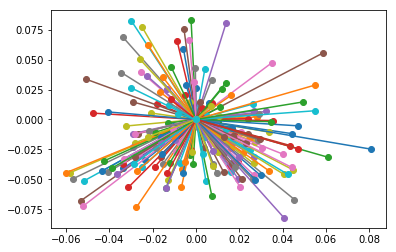

In [57]:
band_id=3
plt.figure(1)
plt.clf()
for a in range(200):
    plt.plot([0,np.real(hilb_phz_dif[band_id,a])],[0,np.imag(hilb_phz_dif[band_id,a])],'o-')

In [ ]:
# Taufik computations (starts at line 9 of precursor.m)
# R=chan1.*conj(chan2)./(abs(chan1)*abs(chan2)) <-this ranges from -1 to 1
# Ab=unwrap(angle(R),[],2) <-in the demo chan I ran this ranges from 0 to pi, but it should range from -pi to pi
# t=padded(Ab)
# deriv=temporal difference of t, this should range from -2*pi to 2pi
# f=moving avg smoothing of t, length of moving window shrinks with freq


In [84]:
#tryme=np.arange(0,2*np.pi,.01)
tryme=np.arange(-np.pi,np.pi,.01)
n=len(tryme)
un=np.zeros(n)
for ct, a in enumerate(tryme):
    dummy=np.unwrap([0,a])
    un[ct]=dummy[1]

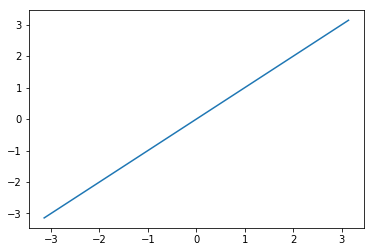

In [85]:
plt.figure(1)
plt.clf()
plt.plot(tryme,un)

In [102]:
np.unwrap?